In [48]:
# Check if the python notebook is working
print("Im Working!")

Im Working!


# Filter Methods
**Filters** evaluate features using intrinsic properties of the data, they select candidate features, then calculate the subset score of those features and only after that we evaluate our model based on the performance of the instrisic properties.
## Advantages
<br>
Good when core pattern recognition cannot be performed on the full dataset, ie evaluation of our model is computationaly costly!

## Disadvantages
<br>
Implies a new model and a set of assuptions about our data, for example, normality assuption, linear dependance etc.

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import seaborn as sns

In [50]:
# Read the dataset
df = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
# Since there are a lot of missing values in ticket and cabin we will drop them
df = df.drop(['Ticket','Cabin'], axis=1) 
df = df.dropna()

In [52]:
# Split our training data for training + validation
from sklearn.model_selection import train_test_split

# Which columns to grab from the dataset
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Grab the columns for the transformation
all_X = df[columns]
all_y = df['Survived']

# Define our train and test sets
train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)


Text(0.5,1,'Distribution of Survival')

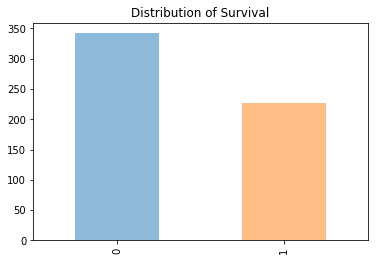

In [53]:
# Plots a bar graph to show quickly how many people survived               
train_X.Survived.value_counts().plot(kind='bar', alpha = 0.5)
plt.title("Distribution of Survival")

Text(0.5,1,'Survival by Age')

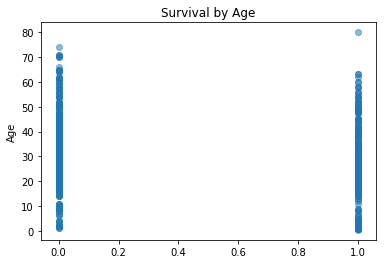

In [54]:
# Scatter plot of those who survived and age
plt.scatter(df.Survived, df.Age, alpha=.5)
# Axis labels and title of the graph
plt.ylabel("Age")                          
plt.title("Survival by Age")

Text(0.5,1,'Passenger class')

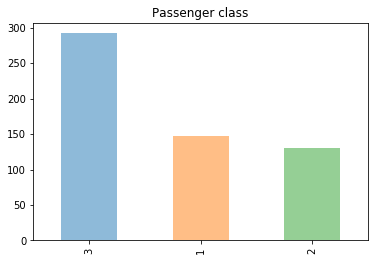

In [55]:
# Plots a bar graph to show quickly how many people survived               
train_X.Pclass.value_counts().plot(kind='bar', alpha = 0.5)
plt.title("Passenger class")

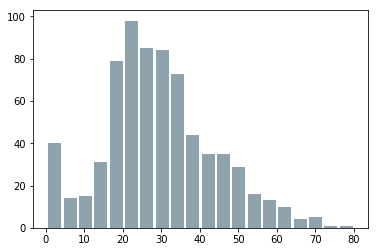

In [56]:
# Plot a histogram of Age
ageHist = plt.hist(x=df.Age, bins='auto', color='#607c8e',
                            alpha=0.7, rwidth=0.85)

C:\Users\Charx\Anaconda2\envs\idscourseenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


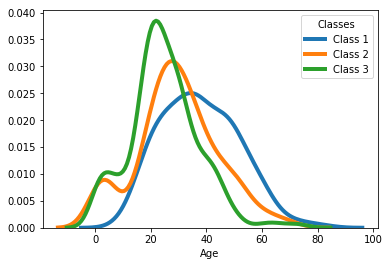

In [57]:
# Density Plot and Histogram of all arrival delays
sns.distplot(train_X.Age[df.Pclass == 1], hist=False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label = ''
            )
sns.distplot(train_X.Age[df.Pclass == 2], hist=False, kde=True,   
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label = ''
            )
sns.distplot(train_X.Age[df.Pclass == 3], hist=False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label = ''
            )

plt.legend(('Class 1','Class 2','Class 3'),prop={'size': 10}, title = 'Classes')
# Minor bug with scipy


## Filtering Methods
Ranking variables according to some statistic and deciding to include them in the model according to such statistic result
### Can be done in various ways one of them ANOVA
Analysis of variance calculates de F-Statistic to see how different are the means of the distributions of our data according to our classes in this case 1 for survivor 0 not surviving.


In [58]:
# Importing the stats package
import scipy.stats as stats
# Series of the age of the people that survived
ageSurvived = train_X.Age[df.Survived == 1]
# Series of the age of the people that did not survived
ageNotSurvived = train_X.Age[df.Survived == 0]

# We calculate the Anova statistic for the variable
stats.f_oneway(ageSurvived, ageNotSurvived)

F_onewayResult(statistic=1.9633746678525783, pvalue=0.16169995412816476)

### Anova Results

Here we can see that the F-statistic is 1.96 and that the corresponding p-value is 0.16 if we had a cutpoint of p < 0.05 this would not be considered statistically significant so we should not consider this variable for our model we are goint to do the same for the rest of the continious variables and discard them if their p-value is above 0.05 otherwise we are going to rank them according to this Statistic


In [59]:
# Next one we are going to consider Sex, Pclass, Fare, Embarked and SibSp(number of siblings and spouses), parch (Number 
#    parents and children one is travelling with), Embarked(the port where the passenger embarked)

# Pclass
pClassSurvived = train_X.Pclass[df.Survived == 1]
pClassNotSurvived = train_X.Pclass[df.Survived == 0]
# Sex
#sexSurvived = df.Sex[df.Survived == 1]
#sexNotSurvived = df.Sex[df.Survived == 0]
# Siblings
sibSpSurvived = train_X.SibSp[df.Survived == 1]
sibSpNotSurvived = train_X.SibSp[df.Survived == 0]
# Parents & Children
parchSurvived = train_X.Parch[df.Survived == 1]
parchNotSurvived = train_X.Parch[df.Survived == 0]
# Where embarked?
#embarkedSurvived = df.Embarked[df.Survived == 1]
#embarkedNotSurvived = df.SibSp[df.Survived == 1]
# Fare
fareSurvived = train_X.Fare[df.Survived == 1]
fareNotSurvived = train_X.Fare[df.Survived == 0]

fAge, pAge = stats.f_oneway(ageSurvived, ageNotSurvived)
fClass, pClass = stats.f_oneway(pClassSurvived, pClassNotSurvived)
fSib, pSib = stats.f_oneway(sibSpSurvived, sibSpNotSurvived)
fParch, pParch = stats.f_oneway(parchSurvived, parchNotSurvived)
fFare, pFare = stats.f_oneway(fareSurvived, fareNotSurvived)

print("The p-value of Age is: " + str(pAge))
print("The p-value of Class is: " + str(pClass))
print("The p-value of # of Siblings is: " + str(pSib))
print("The p-value of # of Parents and children is: " + str(pParch))
print("The p-value of Fare is: " + str(pFare))

The p-value of Age is: 0.16169995412816476
The p-value of Class is: 5.487184140399378e-20
The p-value of # of Siblings is: 0.46609165802064034
The p-value of # of Parents and children is: 0.017105880263189474
The p-value of Fare is: 1.0265102576807696e-11


### Analysis
We are not going to consider the variables Siblings, the $p-value$ is way above our $0.05$ 
threshold.
<br> 

The $p-value$ of Class is much smaller than that of Age s|o it is considered much more statistically significant, the probability of this variation being caused by randomness is almost 0.

<br>

Our hypothesis of the difference in means gets some statistical evidence this way we would pick **Class** then **Fare** and finally **Parch** to be predictors of the Variable **"Titanic Survivor"** in our filtering system we would rank class a much better predictor than age.

### Disadvantages
One of the disadvantages of ANOVA is that it can not be done with categorical variables such as Sex, or Embarked, we are going to need a different kind of statistical test to determine how good a predictor they are or not.



In [60]:
from sklearn.linear_model import LogisticRegression
# Which Variables are we using according to the anova analysis
anovaVariables = ['Pclass', 'Fare', 'Parch']
# Create an instance of the lr
lr = LogisticRegression()

#df[['Pclass', 'Fare']]
# Run the model
lr.fit(train_X[anovaVariables], train_X['Survived'])

# Drop the variables for using sklearn
testVariables = test_X.dropna()
testVariables = test_X[anovaVariables]

#test.drop(['Sex', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)

# Make predictions on the test set
predictions = lr.predict(testVariables)
# Use score method to get accuracy of model

score = lr.score(testVariables, test_y)
print("The model prediction score is: " + str(score))

The model prediction score is: 0.6573426573426573



### Model Results
Model prediction is based on the True Positive rate vs the Predicted positives, this means that we had a 68% chance of being correct in our predictions.
Our model prediction score was **65%** ... quite bad if you ask me maybe we should try another approach for variable selection.

### Second approach correlation with the target variable
<br>
We are going to use correlation as a filter method for variable selection in our titanic dataset
In statistics **Correlation** measures dependance or association of two random variables. We must be cautios as **Correlation** does not imply causation. Correlation can detect linear dependencies between a predictor variable and target variable.
We will be using Pearsons Correlation Coefficient $\rho$
<br>
<br>
$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$
<br>
<br>
Correlation varies between $-1$ and $1$ and indicates how much a variable moves in a certain way if the other one moves to $-1$ indicates perfect negative correlation (when the first variable increases the other one decreases with a fixed proportion) and 1 perfect positive correlation, $0$ indicates no correlation between the two variables.



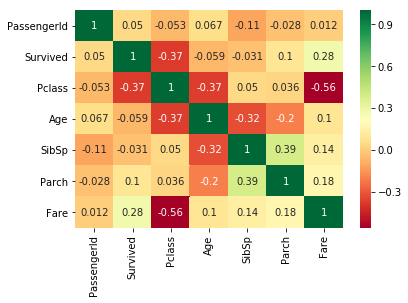

In [61]:
# We are going to use a Seaborn heatmap for correlation between the target variable 'Survived' and all the other variables
def titanic_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    
titanic_corr(train_X)

## Variable Selection
We will now take a look at the correlation between Survived and the other ones and pick the ones with correlations either negative or positive in this case **PClass** with $-0.37$ and **Fare** with $0.28$ as we can see the anova results and the correlation results are turning to be very similar. Now we will run Logistic Regression with those two variables and check if the results differ in any significant way.

In [62]:
from sklearn.linear_model import LogisticRegression
# Which Variables are we using according to the correlation analysis
correlationVariables = ['Pclass', 'Fare']
# Create an instance of the lr
lr = LogisticRegression()

#df[['Pclass', 'Fare']]
# Run the model
lr.fit(train_X[correlationVariables], train_X['Survived'])

# Drop the variables for using sklearn
testVariables = test_X.dropna()
testVariables = test_X[correlationVariables]

#test.drop(['Sex', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)

# Make predictions on the test set
predictions = lr.predict(testVariables)
# Use score method to get accuracy of model

score = lr.score(testVariables, test_y)

print("The model prediction score is: " + str(score))

The model prediction score is: 0.6363636363636364



## Results
Our prediction score went down to 63% but another thing can be concluded in our correlation analysis, maybe **Passenger Class** and **Fare** are redundant variables since they are highly correlated, we should run again the model with only **Passenger Class** and the third most correlated variable and check our results!

In [63]:
from sklearn.linear_model import LogisticRegression
# Which Variables are we using according to the correlation analysis
correlationVariables = ['Pclass', 'Parch']
# Create an instance of the lr
lr = LogisticRegression()

#df[['Pclass', 'Fare']]
# Run the model
lr.fit(train_X[correlationVariables], train_X['Survived'])

# Drop the variables for using sklearn
testVariables = test_X.dropna()
testVariables = test_X[correlationVariables]

#test.drop(['Sex', 'Cabin', 'Embarked', 'Name', 'PassengerId'], axis=1)

# Make predictions on the test set
predictions = lr.predict(testVariables)
# Use score method to get accuracy of model

score = lr.score(testVariables, test_y)

print("The model prediction score is: " + str(score))

The model prediction score is: 0.6643356643356644


## Improvement
The new score is 66% a 3% by removing a redundant variable and adding the next most significate variable. Now we can see results very similar to the anova ones. Note: the results are not considering the variables **Sex**, and **Embarked** this due to them being categorical variables we should consider using anothr statistical test such as $\chi^2$ test for independance or encode them in a different manner.

## Information Theory, Entropy and Information Gain
The last approach we are going to consider is the information value of a variable, we are going to be using entropy and information gain as a way to rank the predictive power of our variables. **Entropy** measures how predictable are events. **Higher entropy** means there is **more unpredictability** in the events being measured. In other words 100% predictability = 0 entropy. In contrast a 50% 50% chance is entropy of one!
Following this conception we should **pick the variable which gives us the greatest decrease in entropy** and that is information Gain.
### Information Gain
Decision Trees use information gain as a mesure of imputiry and a way to split the leaf nodes.

In [64]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.09436621 0.02600616 0.39427329 0.48535434]


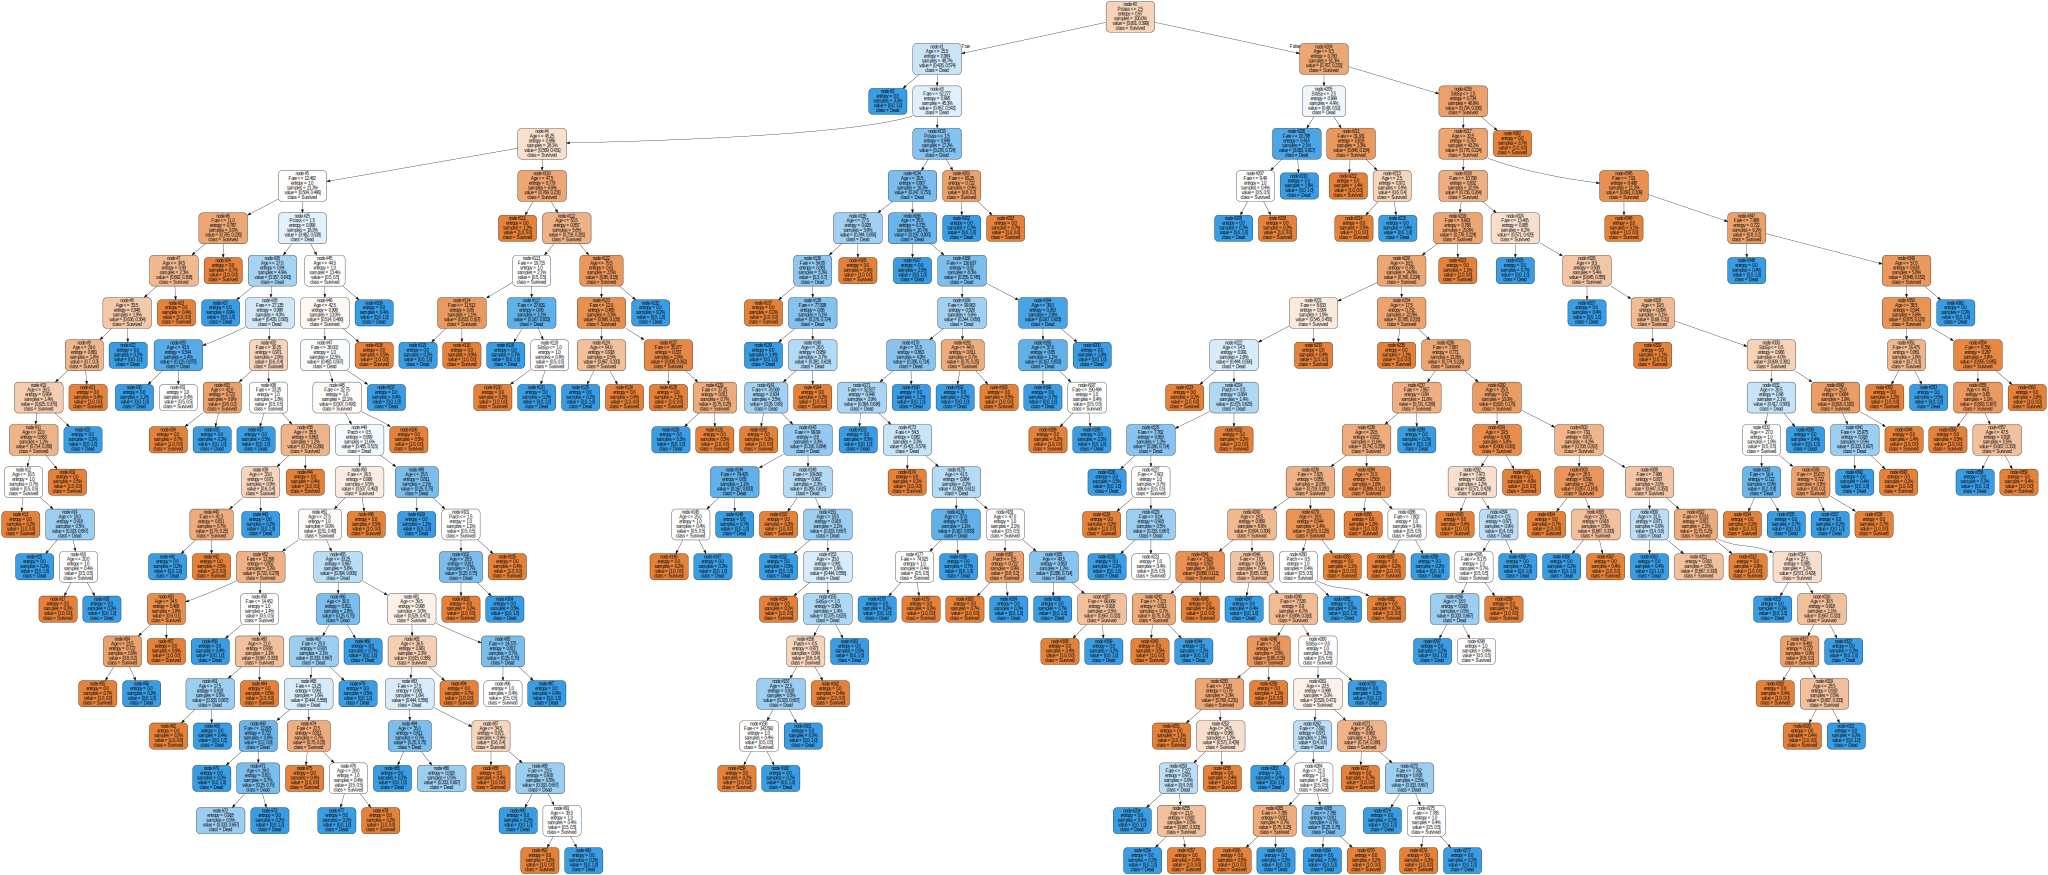

In [109]:
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image
from io import StringIO
import pydotplus
import graphviz



# Remove the features that need pre-processing
treeTrain = train_X[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]
treeTest = train_X['Survived']

# Fit a decision tree model based on entropy to the data
decisionTree = DecisionTreeClassifier(criterion = 'entropy').fit(treeTrain,treeTest)

# Print feature importances
#print('Feature Importances according to the decision tree: ')
#for name, importance in zip(treeTrain.columns, decisionTree.feature_importances_):
#    print(name, importance)

    
# Visualize the tree
dot_data = tree.export_graphviz(decisionTree,
                                out_file=None,
                                node_ids = True,
                                proportion = True,
                                filled = True,
                                feature_names= treeTrain.columns,
                                class_names=['Survived', 'Dead'],
                                rounded = True)
graph = graphviz.Source(dot_data)
export_graphviz(decisionTree, out_file="graph.dot")
graph


## Results
The new approach showed that Age and Pclass where the most promising in terms of spliting so we are goint to use them for our logistics model.

In [103]:
# Which Variables are we using according to the decision tree
treeVariables = ['Age', 'Pclass']
# Create an instance of the lr
lr = LogisticRegression()

# Run the model
lr.fit(train_X[treeVariables], train_X['Survived'])

# Drop the variables for using sklearn
testVariables = test_X.dropna()
testVariables = test_X[treeVariables]

# Make predictions on the test set
predictions = lr.predict(testVariables)

# Use score method to get accuracy of model
score = lr.score(testVariables, test_y)

print("The model prediction score is: " + str(score))

The model prediction score is: 0.7062937062937062
